In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import integrate, interpolate  
from scipy.stats import gengamma, laplace, norm
import matplotlib.pyplot as plt
import pickle
import os
from wavelet_helper import *

# Vanishing Point Demonstration

array([-5.       , -4.9989999, -4.9979998, ...,  4.9979998,  4.9989999,
        5.       ])

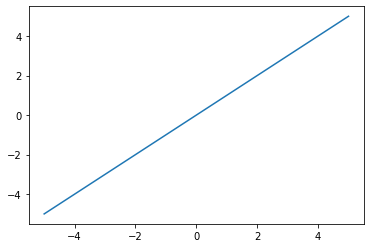

In [2]:
x = np.linspace(-5, 5, num = 10000)
signal = x 
plt.plot(x, signal)
signal



,cA,cD
0,-7.067961,-1.911393e-04
1,-7.070935,1.911393e-04
2,-7.069912,4.718448e-16
3,-7.067083,7.494005e-16
4,-7.064254,-2.498002e-16
...,...,...
4997,7.059495,-6.938894e-16
4998,7.062323,1.665335e-16
4999,7.065152,-7.494005e-16
5000,7.067961,1.911393e-04


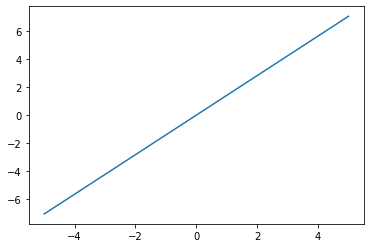

In [3]:

(cA, cD) = pywt.dwt(signal, 'db3')
xx = np.linspace(-5, 5, num = len(cA))
plt.plot(xx, cA)
pd.DataFrame({"cA":cA, "cD":cD})


array([25.      , 24.99    , 24.980002, ..., 24.980002, 24.99    ,
       25.      ])

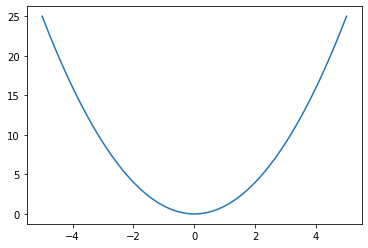

In [4]:
x = np.linspace(-5, 5, num = 10000)
signal = x**2
plt.plot(x, signal)
signal

,cA,cD
0,35.324274,1.911584e-03
1,35.354015,-1.911584e-03
2,35.343779,-4.773959e-15
3,35.315502,-2.997602e-15
4,35.287237,2.886580e-15
...,...,...
4997,35.239703,-6.550316e-15
4998,35.267949,-7.771561e-16
4999,35.296207,-8.992806e-15
5000,35.324274,1.911584e-03


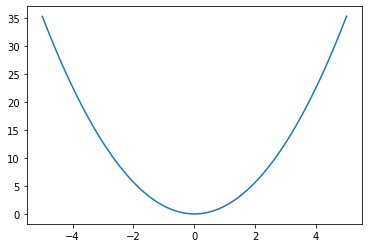

In [5]:
(cA, cD) = pywt.dwt(signal, 'db3')
xx = np.linspace(-5, 5, num = len(cA))
plt.plot(xx, cA)
pd.DataFrame({"cA":cA, "cD":cD})

In [6]:
pd.DataFrame(pywt.wavedec(signal, 'db1'))[np.arange(0,11)]

,0,1,2,3,4,5,6,7,8,9,10
0,580.248735,1626.959811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335.204788,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,387.001941,-149.976362,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,184.288473,89.363223,-5.562026,-100.487276,-188.521552,NaN,NaN,NaN,NaN,NaN,NaN
4,73.546100,56.765529,39.984957,23.204385,6.423813,-10.356759,-27.137331,-43.917903,-60.698475,-67.733738,NaN
5,27.485680,24.519266,21.552852,18.586438,15.620024,12.653610,9.687196,6.720782,3.754368,0.787954,-2.178460
6,9.979852,9.455459,8.931066,8.406673,7.882280,7.357888,6.833495,6.309102,5.784709,5.260316,4.735923
7,3.574761,3.482060,3.389360,3.296659,3.203959,3.111258,3.018558,2.925858,2.833157,2.740457,2.647756
8,1.272062,1.255675,1.239288,1.222901,1.206513,1.190126,1.173739,1.157351,1.140964,1.124577,1.108190
9,0.451190,0.448294,0.445397,0.442500,0.439603,0.436706,0.433809,0.430912,0.428015,0.425118,0.422222


In [7]:
pd.DataFrame(pywt.wavedec(signal, 'db3'))[np.arange(10,20)]

,10,11,12,13,14,15,16,17,18,19
0,1.260383e+02,2.882618e+02,5.269729e+02,7.948906e+02,NaN,NaN,NaN,NaN,NaN,NaN
1,3.415461e-01,1.565604e+01,1.013111e+01,-2.558936e+01,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.220446e-16,7.771561e-16,6.661338e-16,1.575129e-15,-8.382184e-15,-7.771561e-15,-3.108624e-15,3.996803e-15,-1.243450e-14,-1.091637e-04
3,3.552714e-15,-1.643130e-14,-4.440892e-16,-3.996803e-15,-2.664535e-15,2.664535e-15,-1.332268e-15,7.771561e-16,0.000000e+00,7.771561e-16
4,6.217249e-15,-7.993606e-15,1.687539e-14,-5.329071e-15,1.154632e-14,6.661338e-15,6.661338e-15,-4.884981e-15,2.220446e-15,8.881784e-16
5,9.769963e-15,7.105427e-15,2.220446e-15,9.769963e-15,-1.776357e-15,-1.376677e-14,-7.549517e-15,-2.220446e-15,-7.549517e-15,8.881784e-16
6,4.884981e-15,1.332268e-14,4.440892e-15,-7.105427e-15,8.437695e-15,-7.549517e-15,-9.325873e-15,3.552714e-15,-1.731948e-14,-8.437695e-15
7,-1.376677e-14,3.552714e-15,-5.773160e-15,-1.332268e-15,-1.509903e-14,-3.108624e-15,-6.217249e-15,6.661338e-15,4.440892e-16,1.199041e-14
8,-9.103829e-15,4.440892e-15,2.220446e-16,-1.132427e-14,-7.549517e-15,-1.554312e-15,5.773160e-15,0.000000e+00,3.774758e-15,3.330669e-15
9,4.440892e-15,-1.332268e-15,2.220446e-16,-1.332268e-15,1.110223e-15,2.442491e-15,-8.881784e-16,-6.661338e-16,-3.108624e-15,-3.996803e-15


In [8]:
pd.DataFrame(pywt.wavedec(signal, 'sym3'))[np.arange(10,20)]

,10,11,12,13,14,15,16,17,18,19
0,1.260383e+02,2.882618e+02,5.269729e+02,7.948906e+02,NaN,NaN,NaN,NaN,NaN,NaN
1,3.415461e-01,1.565604e+01,1.013111e+01,-2.558936e+01,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.632519e-10,-8.302181e-11,-2.794820e-11,1.972957e-12,6.733288e-12,-1.365263e-11,-5.920753e-11,-1.299065e-10,-2.257443e-10,-1.091641e-04
3,-4.007017e-10,-3.431126e-10,-2.899707e-10,-2.412932e-10,-1.970610e-10,-1.572669e-10,-1.219298e-10,-9.102963e-11,-6.458267e-11,-4.258133e-11
4,-4.268648e-10,-4.013243e-10,-3.766321e-10,-3.526619e-10,-3.295044e-10,-3.071232e-10,-2.855423e-10,-2.647349e-10,-2.447296e-10,-2.254916e-10
5,-3.601510e-10,-3.501999e-10,-3.404037e-10,-3.307359e-10,-3.212346e-10,-3.118426e-10,-3.025922e-10,-2.935132e-10,-2.845342e-10,-2.757119e-10
6,-2.766143e-10,-2.729412e-10,-2.692775e-10,-2.656440e-10,-2.620273e-10,-2.584968e-10,-2.549179e-10,-2.514042e-10,-2.478937e-10,-2.444227e-10
7,-2.035834e-10,-2.022449e-10,-2.009481e-10,-1.996110e-10,-1.983005e-10,-1.969815e-10,-1.956675e-10,-1.943650e-10,-1.930669e-10,-1.917884e-10
8,-1.468083e-10,-1.463398e-10,-1.458729e-10,-1.453977e-10,-1.449363e-10,-1.444633e-10,-1.439839e-10,-1.435210e-10,-1.430494e-10,-1.425760e-10
9,-1.048388e-10,-1.046667e-10,-1.045035e-10,-1.043361e-10,-1.041589e-10,-1.039939e-10,-1.038274e-10,-1.036642e-10,-1.034919e-10,-1.033262e-10


In [9]:
pywt.Wavelet("bior5.5").filter_bank

([0.0,
  0.0,
  0.03968708834740544,
  0.007948108637240322,
  -0.05446378846823691,
  0.34560528195603346,
  0.7366601814282105,
  0.34560528195603346,
  -0.05446378846823691,
  0.007948108637240322,
  0.03968708834740544,
  0.0],
 [-0.013456709459118716,
  -0.002694966880111507,
  0.13670658466432914,
  -0.09350469740093886,
  -0.47680326579848425,
  0.8995061097486484,
  -0.47680326579848425,
  -0.09350469740093886,
  0.13670658466432914,
  -0.002694966880111507,
  -0.013456709459118716,
  0.0],
 [0.013456709459118716,
  -0.002694966880111507,
  -0.13670658466432914,
  -0.09350469740093886,
  0.47680326579848425,
  0.8995061097486484,
  0.47680326579848425,
  -0.09350469740093886,
  -0.13670658466432914,
  -0.002694966880111507,
  0.013456709459118716,
  0.0],
 [0.0,
  -0.0,
  0.03968708834740544,
  -0.007948108637240322,
  -0.05446378846823691,
  -0.34560528195603346,
  0.7366601814282105,
  -0.34560528195603346,
  -0.05446378846823691,
  -0.007948108637240322,
  0.0396870883474054

In [14]:
biorlist = pywt.wavelist("db")
coeffs_count = [len(pywt.Wavelet(wav).filter_bank[0]) for wav in  biorlist]
pd.DataFrame(np.array([biorlist,coeffs_count]).T, columns = ["wavelet name", "coefficent #"])

,wavelet name,coefficent #
0,db1,2
1,db2,4
2,db3,6
3,db4,8
4,db5,10
5,db6,12
6,db7,14
7,db8,16
8,db9,18
9,db10,20


In [13]:
pywt.wavelist("dmey")

['dmey']